In [133]:
import numpy as np
import pandas as pd

In [134]:
import os
DATA_PATH = 'datasets/churn'

churn_df = pd.read_csv(os.path.join(os.curdir, DATA_PATH, 'churn.csv'))
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   State           3333 non-null   object 
 1   Account Length  3333 non-null   int64  
 2   Area Code       3333 non-null   int64  
 3   Phone           3333 non-null   object 
 4   Int'l Plan      3333 non-null   object 
 5   VMail Plan      3333 non-null   object 
 6   VMail Message   3333 non-null   int64  
 7   Day Mins        3333 non-null   float64
 8   Day Calls       3333 non-null   int64  
 9   Day Charge      3333 non-null   float64
 10  Eve Mins        3333 non-null   float64
 11  Eve Calls       3333 non-null   int64  
 12  Eve Charge      3333 non-null   float64
 13  Night Mins      3333 non-null   float64
 14  Night Calls     3333 non-null   int64  
 15  Night Charge    3333 non-null   float64
 16  Intl Mins       3333 non-null   float64
 17  Intl Calls      3333 non-null   i

In [135]:
churn_df.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [136]:
churn_df['Area Code'] = churn_df['Area Code'].astype(object)
churn_df.drop(columns=['Phone'], inplace=True)

In [137]:
churn_df.corr()

,Account Length,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls
Account Length,1.000000,-0.004628,0.006216,0.038470,0.006214,-0.006757,0.019260,-0.006745,-0.008955,-0.013176,-0.008960,0.009514,0.020661,0.009546,-0.003796
VMail Message,-0.004628,1.000000,0.000778,-0.009548,0.000776,0.017562,-0.005864,0.017578,0.007681,0.007123,0.007663,0.002856,0.013957,0.002884,-0.013263
Day Mins,0.006216,0.000778,1.000000,0.006750,1.000000,0.007043,0.015769,0.007029,0.004323,0.022972,0.004300,-0.010155,0.008033,-0.010092,-0.013423
Day Calls,0.038470,-0.009548,0.006750,1.000000,0.006753,-0.021451,0.006462,-0.021449,0.022938,-0.019557,0.022927,0.021565,0.004574,0.021666,-0.018942
Day Charge,0.006214,0.000776,1.000000,0.006753,1.000000,0.007050,0.015769,0.007036,0.004324,0.022972,0.004301,-0.010157,0.008032,-0.010094,-0.013427
Eve Mins,-0.006757,0.017562,0.007043,-0.021451,0.007050,1.000000,-0.011430,1.000000,-0.012584,0.007586,-0.012593,-0.011035,0.002541,-0.011067,-0.012985
Eve Calls,0.019260,-0.005864,0.015769,0.006462,0.015769,-0.011430,1.000000,-0.011423,-0.002093,0.007710,-0.002056,0.008703,0.017434,0.008674,0.002423
Eve Charge,-0.006745,0.017578,0.007029,-0.021449,0.007036,1.000000,-0.011423,1.000000,-0.012592,0.007596,-0.012601,-0.011043,0.002541,-0.011074,-0.012987
Night Mins,-0.008955,0.007681,0.004323,0.022938,0.004324,-0.012584,-0.002093,-0.012592,1.000000,0.011204,0.999999,-0.015207,-0.012353,-0.015180,-0.009288
Night Calls,-0.013176,0.007123,0.022972,-0.019557,0.022972,0.007586,0.007710,0.007596,0.011204,1.000000,0.011188,-0.013605,0.000305,-0.013630,-0.012802


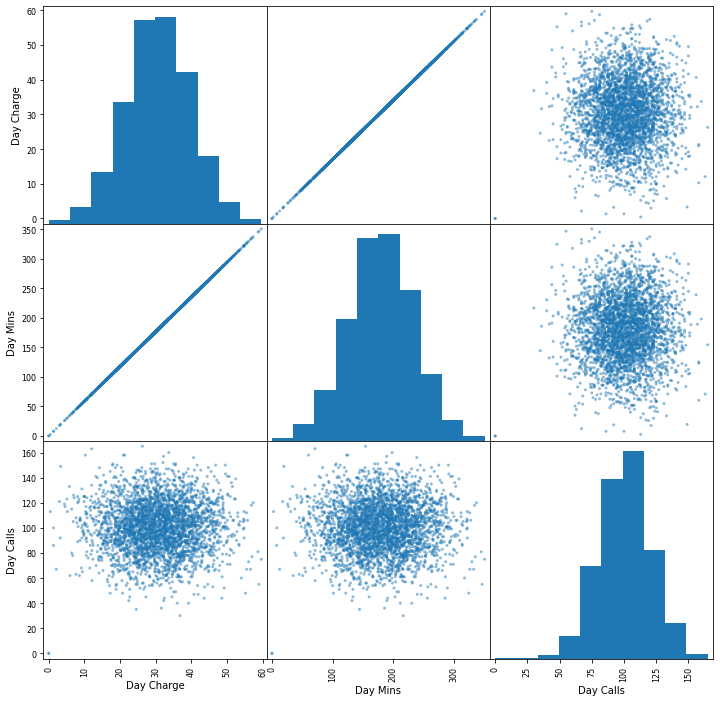

In [138]:
import matplotlib.pyplot as plt
pd.plotting.scatter_matrix(churn_df[['Day Charge', 'Day Mins', 'Day Calls']], figsize=(12,12))
plt.show()

In [139]:
churn_df.drop(columns=['Day Charge', 'Eve Charge', 'Night Charge', 'Intl Charge'], inplace=True)

In [140]:
churn_df.isnull().sum()

State             0
Account Length    0
Area Code         0
Int'l Plan        0
VMail Plan        0
VMail Message     0
Day Mins          0
Day Calls         0
Eve Mins          0
Eve Calls         0
Night Mins        0
Night Calls       0
Intl Mins         0
Intl Calls        0
CustServ Calls    0
Churn?            0
dtype: int64

In [141]:
churn_df.isna().sum()

State             0
Account Length    0
Area Code         0
Int'l Plan        0
VMail Plan        0
VMail Message     0
Day Mins          0
Day Calls         0
Eve Mins          0
Eve Calls         0
Night Mins        0
Night Calls       0
Intl Mins         0
Intl Calls        0
CustServ Calls    0
Churn?            0
dtype: int64

In [142]:
from sklearn.preprocessing import LabelEncoder
label_attribute = 'Churn?'
label_encoder = LabelEncoder()
churn_df[label_attribute] = label_encoder.fit_transform(churn_df[label_attribute])
churn_df.dtypes

State              object
Account Length      int64
Area Code          object
Int'l Plan         object
VMail Plan         object
VMail Message       int64
Day Mins          float64
Day Calls           int64
Eve Mins          float64
Eve Calls           int64
Night Mins        float64
Night Calls         int64
Intl Mins         float64
Intl Calls          int64
CustServ Calls      int64
Churn?              int32
dtype: object

In [143]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

cat_attributes = ["Int'l Plan", "VMail Plan", "Area Code", "State"]
num_attributes = ['Account Length','VMail Message', 'Day Mins','Day Calls','Eve Mins','Eve Calls','Night Mins','Night Calls', 'Intl Mins','Intl Calls','CustServ Calls']

colTransformer = ColumnTransformer([
    ('onehot_encoder', OneHotEncoder(categories='auto', sparse=False), cat_attributes),
    ('std_scaler', StandardScaler(), num_attributes)
], remainder='passthrough')
colTransformer.fit(churn_df[cat_attributes + num_attributes])

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehot_encoder', OneHotEncoder(sparse=False),
                                 ["Int'l Plan", 'VMail Plan', 'Area Code',
                                  'State']),
                                ('std_scaler', StandardScaler(),
                                 ['Account Length', 'VMail Message', 'Day Mins',
                                  'Day Calls', 'Eve Mins', 'Eve Calls',
                                  'Night Mins', 'Night Calls', 'Intl Mins',
                                  'Intl Calls', 'CustServ Calls'])])

In [144]:
X = colTransformer.transform(churn_df[cat_attributes + num_attributes])
X[:2]

array([[ 1.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.67648946,  1.23488274,
         1.56676695,  0.47664315, -0.07060962, -0.05594035,  0.86674322,
        -0.46549436, -0.08500823, -0.60119509, -0.4

In [145]:
X.shape

(3333, 69)

In [146]:
y = churn_df['Churn?'].values
y.shape

(3333,)

In [147]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print("Train shape: {}  Test shape: {}".format(X_train.shape, X_test.shape))

Train shape: (2666, 69)  Test shape: (667, 69)


In [148]:
import tensorflow as tf
network = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', kernel_initializer='he_normal', input_shape=(X_train.shape[1],), kernel_regularizer='l2'),
    tf.keras.layers.Dense(128, activation='relu', kernel_initializer='he_normal', kernel_regularizer='l2'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

network.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [149]:
def get_log_dir():
    import time, os
    return os.path.join(os.curdir, 'churn_logs', time.strftime("run_%Y_%m_%d-%H_%M_%S"))
log_dir = get_log_dir()
tensorboard_cb = tf.keras.callbacks.TensorBoard(log_dir)
history = network.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1, callbacks=[tensorboard_cb])
history.history

Epoch 1/20
75/75 [==============================] - 1s 13ms/step - loss: 3.6240 - accuracy: 0.8522 - val_loss: 2.3514 - val_accuracy: 0.8352
Epoch 2/20
75/75 [==============================] - 0s 1ms/step - loss: 2.0010 - accuracy: 0.8730 - val_loss: 1.3558 - val_accuracy: 0.8502
Epoch 3/20
75/75 [==============================] - 0s 1ms/step - loss: 1.1300 - accuracy: 0.8788 - val_loss: 0.8050 - val_accuracy: 0.8614
Epoch 4/20
75/75 [==============================] - 0s 1ms/step - loss: 0.6618 - accuracy: 0.8981 - val_loss: 0.5569 - val_accuracy: 0.8577
Epoch 5/20
75/75 [==============================] - 0s 1ms/step - loss: 0.4801 - accuracy: 0.9051 - val_loss: 0.4426 - val_accuracy: 0.8764
Epoch 6/20
75/75 [==============================] - 0s 932us/step - loss: 0.3661 - accuracy: 0.9165 - val_loss: 0.4042 - val_accuracy: 0.8764
Epoch 7/20
75/75 [==============================] - 0s 945us/step - loss: 0.3335 - accuracy: 0.9206 - val_loss: 0.3943 - val_accuracy: 0.8764
Epoch 8/20
75/7

{'loss': [3.1383275985717773,
  1.7522943019866943,
  0.9925917983055115,
  0.6069244742393494,
  0.4376125633716583,
  0.3670404255390167,
  0.3325752019882202,
  0.31229111552238464,
  0.2970435619354248,
  0.2890453636646271,
  0.2798645496368408,
  0.2714656889438629,
  0.2673952877521515,
  0.2627561092376709,
  0.2595279812812805,
  0.25317564606666565,
  0.24889147281646729,
  0.24622449278831482,
  0.243778258562088,
  0.2402268946170807],
 'accuracy': [0.8578574657440186,
  0.8716131448745728,
  0.8849520683288574,
  0.8987078070640564,
  0.9070445895195007,
  0.9141308665275574,
  0.9203835129737854,
  0.9216340184211731,
  0.9208003282546997,
  0.9278866052627563,
  0.9245519042015076,
  0.9324718713760376,
  0.9324718713760376,
  0.9320549964904785,
  0.9287202954292297,
  0.9283034801483154,
  0.9341392517089844,
  0.934972882270813,
  0.9341392517089844,
  0.9374739527702332],
 'val_loss': [2.3514256477355957,
  1.3557872772216797,
  0.8049847483634949,
  0.55689537525177